In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
# drop missing questions 
df.dropna(inplace=True)
print(df.isna().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [ ]:
# df_test = df.groupby('is_duplicate', group_keys=False).apply(lambda x : x.sample(frac=0.3)).reset_index(drop=True)
# df_train = df[~df.index.isin(df_test.index)].reset_index(drop=True)

In [109]:
df['is_duplicate'].value_counts(normalize=True).reset_index()

,index,is_duplicate
0,0,0.630799
1,1,0.369201


In [5]:
import re

from nltk.corpus import stopwords
engStopWords = stopwords.words('english')

import string
puncts = string.punctuation

from nltk import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

AttributeError: 'str' object has no attribute 'isin'

In [6]:
def del_stopWords(text):
    word_list = text.split()
    text =" ".join([word for word in word_list if word not in engStopWords])
    return text

def del_punct(text):
    text="".join([char for char in text if char not in puncts])
    return text

def lem_text(text):
    word_list = text.split()
    text=" ".join([lemmatizer.lemmatize(word) for word in word_list])
    return text

def preprocess_text(text_list):
    text_clean=[]
    for text in text_list:
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text) # remove urls
        text = re.sub(r'<.*?>', '', text) # remove htmls
        text = del_punct(text)
        text = del_stopWords(text)
        text = lem_text(text)
        text = re.sub(r'\s+', ' ', text).strip()
        text_clean.append(text)
    return text_clean


In [7]:
df['q1_clean'] = preprocess_text(df['question1'])

In [8]:
df['q2_clean'] = preprocess_text(df['question2'])

In [10]:
df_eda = df[['is_duplicate','q1_clean','q2_clean']]

In [11]:
df_eda['numWord_diff'] = abs(df_eda['q1_clean'].apply(lambda x: len(x.split())) - df_eda['q2_clean'].apply(lambda x: len(x.split())))

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_17070/129237030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['numWord_diff'] = abs(df_eda['q1_clean'].apply(lambda x: len(x.split())) - df_eda['q2_clean'].apply(lambda x: len(x.split())))


In [12]:
df_eda['q1_first'] = df_eda['q1_clean'].str.split().str.get(0)
df_eda['q2_first'] = df_eda['q2_clean'].str.split().str.get(0)
df_eda['q1_last'] = df_eda['q1_clean'].str.split().str.get(-1)
df_eda['q2_last'] = df_eda['q2_clean'].str.split().str.get(-1)

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_17070/205891349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['q1_first'] = df_eda['q1_clean'].str.split().str.get(0)
/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_17070/205891349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['q2_first'] = df_eda['q2_clean'].str.split().str.get(0)
/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_17070/205891349.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [13]:
df_eda['same_first'] = np.where(df_eda['q1_first']==df_eda['q2_first'], 1, 0)
df_eda['same_last'] = np.where(df_eda['q1_last']==df_eda['q2_last'], 1, 0)

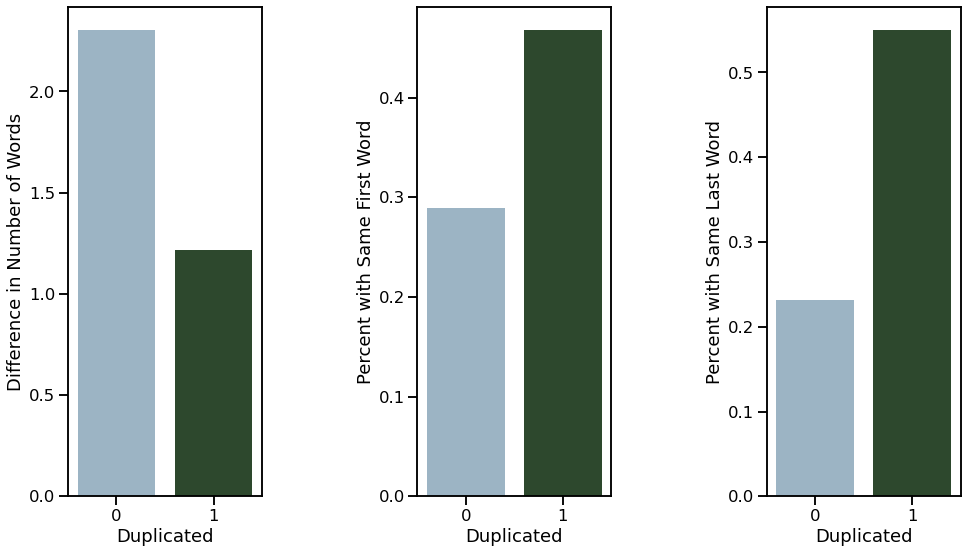

In [141]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1,3, figsize=(16,9))
    sns.set_palette(palette=['#95b5cb','#294d28'], n_colors=2)
    fig1 = sns.barplot(data=df_eda, x='is_duplicate', y='numWord_diff', ci=False, ax=ax[0])
    fig1.set_ylabel('Difference in Number of Words')
    fig1.set_xlabel('Duplicated')

    fig2 = sns.barplot(data=df_eda, x='is_duplicate', y='same_first', ci=False, ax=ax[1])
    fig2.set_ylabel('Percent with Same First Word')
    fig2.set_xlabel('Duplicated')

    fig3 = sns.barplot(data=df_eda, x='is_duplicate', y='same_last', ci=False, ax=ax[2])
    fig3.set_ylabel('Percent with Same Last Word')
    fig3.set_xlabel('Duplicated')

    plt.subplots_adjust(wspace=0.8)
    plt.savefig('questions_eda.png')

In [133]:
df_eda.head()

,is_duplicate,q1_clean,q2_clean,numWord_diff,q1_first,q2_first,q1_last,q2_last,same_first,same_last
0,0,step step guide invest share market india,step step guide invest share market,1,step,step,india,market,1,0
1,0,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,5,story,would,diamond,back,0,0
2,0,increase speed internet connection using vpn,internet speed increased hacking dns,1,increase,internet,vpn,dns,0,0
3,0,mentally lonely solve,find remainder math2324math divided 2423,2,mentally,find,solve,2423,0,0
4,0,one dissolve water quikly sugar salt methane c...,fish would survive salt water,5,one,fish,oxide,water,0,0


In [18]:
temp_text = df_eda.q1_clean[0]

In [19]:
temp_text

'step step guide invest share market india'

In [21]:
from wordcloud import WordCloud

In [27]:
allq = df_eda['q1_clean'] + df_eda['q2_clean']

In [29]:
allq_str = ""
for x in allq:
    allq_str += x

In [37]:
wc = WordCloud(min_word_length=4, background_color='white').generate(allq_str)

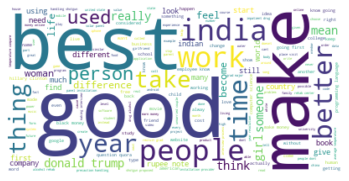

In [38]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
wc2 = WordCloud(min_word_length=5, background_color='white').generate(allq_str)

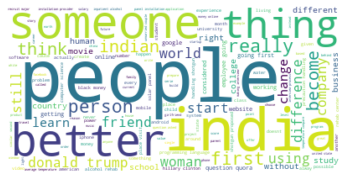

In [41]:
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
cv = CountVectorizer(ngram_range=(2,3), stop_words='english', min_df=10, max_df=0.8, max_features=1000)

In [115]:
word_count_vector = cv.fit_transform(allq)

In [116]:
word_count_vector.shape

(404287, 1000)

In [117]:
allq_vocab = cv.vocabulary_

In [118]:
wc3 = WordCloud(background_color='white', width=1080, height=720, colormap='PuBuGn').generate_from_frequencies(allq_vocab)

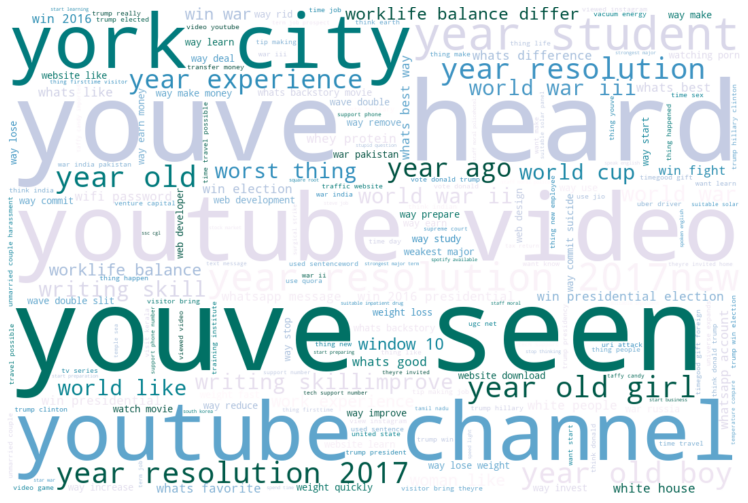

In [119]:
plt.figure(figsize=(16,9))
plt.imshow(wc3, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud_2ngram_3.png')
plt.show()